## Importing and preparing the data

In [1]:
import pickle
with open("mypickle.pickle", "rb") as f:
    b,m,x_list,y_list,output_list=pickle.load(f)

In [2]:
datapoints=[]
for i in range(len(x_list)):
    datapoints.append((x_list[i],y_list[i],output_list[i]))
datapoints

[(-0.2785182570599216, 0.35736533933707015, 1),
 (-0.15542875861062888, 0.6092400728780518, 1),
 (0.5589798738044336, -0.0031110053572469543, -1),
 (-0.07504881197093072, -0.9075125020126005, -1),
 (0.7858640112049751, -0.6100142975214418, -1),
 (0.5992151322591437, 0.7828827194446986, 1),
 (0.05200396997836165, -0.23025220577865158, -1),
 (-0.7358655314948499, -0.6695352236214229, 1),
 (-0.8931493799407217, 0.6610152371394398, 1),
 (0.33272114174699285, -0.44308093198321674, -1)]

In [3]:
import Percepton as P

In [4]:
a=[1,2,3]
P.innerproduct(a,2,2)

11

In [5]:
## Testing syntax
tuple_test=[(1,2,3),(4,5,6)]

for x,y,z in tuple_test:
    print(x)
    print(y)
    print(z)

1
2
3
4
5
6


## Testing comparer function

In [6]:
test_vec=[-0.3,2/3,1]
def test_vec_lin(weight_vector):
    '''This function returns the line for a weight vector'''
    b=-weight_vector[0]/weight_vector[2]
    m=-weight_vector[1]/weight_vector[2]
    def line(x):
        return m*x+b
    return line

(-1, 1)

(-1, 1)

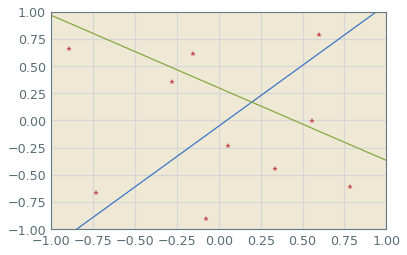

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def new_line(x):
    '''This is the original line'''
    return m*x+b
test_line=test_vec_lin(test_vec)
domain = np.linspace(-1, 11)
plt.plot(domain, new_line(domain))
plt.plot(domain, test_line(domain))
plt.plot(x_list,y_list,linestyle='None',marker='*')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [8]:
for x,y,z in datapoints:
    print(x,y)
    print(P.comparer([0,0,0],x,y,z))

-0.2785182570599216 0.35736533933707015
False
-0.15542875861062888 0.6092400728780518
False
0.5589798738044336 -0.0031110053572469543
False
-0.07504881197093072 -0.9075125020126005
False
0.7858640112049751 -0.6100142975214418
False
0.5992151322591437 0.7828827194446986
False
0.05200396997836165 -0.23025220577865158
False
-0.7358655314948499 -0.6695352236214229
False
-0.8931493799407217 0.6610152371394398
False
0.33272114174699285 -0.44308093198321674
False


In [9]:
## testing multiple output syntax
def add(x):
    return x+1,x+2
asf1,adaf3=add(2)
asf1
adaf3

3

4

In [10]:
## Testing break syntax
i=0
while i<5:
    i=i+1
    for x in range(4):
        if x<1:
            print("hi")
        else:
            break

hi
hi
hi
hi
hi


In [11]:
final_weight_vector,counter=P.PLA([-0.5,0.3,0.2],datapoints)
final_weight_vector
counter
#prob

-0.5
0.5
-0.5
0.5
-0.5
0.5
-0.5
0.5
-0.5
0.5
-0.5
0.5


[0.5, -2.2422586816755716, 2.01955512987037]

12

(-1, 1)

(-1, 1)

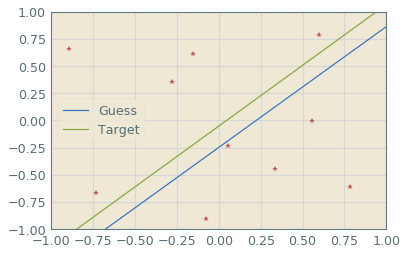

In [12]:
final_line=test_vec_lin(final_weight_vector)
plt.plot(domain,final_line(domain),label='Guess')
plt.plot(domain,new_line(domain), label='Target')
plt.plot(x_list,y_list,linestyle='None',marker='*')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In [13]:
## Testing adjust synatx
ads=[x1 + x2 for (x1, x2) in zip([0,0,0], [1,2,3])]
ads

[1, 2, 3]

In [14]:
import PerceptonSetup as setup

In [15]:
test_a=np.array([1,2,3])
test_b=np.array([-0.5,1.4,3.4])

In [16]:
import Probability as prob

In [17]:
type(prob.list_classifier(test_a,test_b,new_line))

numpy.ndarray

In [18]:
matching_list=np.array([True,True,False])==np.array([True,False,True])
np.sum(matching_list)

1

In [19]:
matching_list.size

3

(-1, 1)

(-1, 1)

/home/benson/Software/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


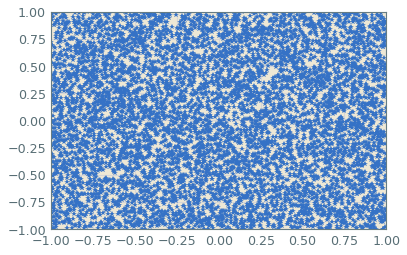

In [20]:
x_sample_points,y_sample_points=setup.random_points(8000)
plt.plot(x_sample_points,y_sample_points,linestyle='None',marker='*')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In [21]:
m
b

1.1169698503730756

-0.05137064645286335